In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
import warnings
warnings.simplefilter('ignore')

In [52]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/water-treatment/water-treatment.data')

In [53]:
df.shape

(526, 39)

     1  Q-E        (input flow to plant)  
     2  ZN-E       (input Zinc to plant)
     3  PH-E       (input pH to plant) 
     4  DBO-E      (input Biological demand of oxygen to plant) 
     5  DQO-E      (input chemical demand of oxygen to plant)
     6  SS-E       (input suspended solids to plant)  
     7  SSV-E      (input volatile supended solids to plant)
     8  SED-E      (input sediments to plant) 
     9  COND-E     (input conductivity to plant) 
    10  PH-P       (input pH to primary settler)
    11  DBO-P      (input Biological demand of oxygen to primary settler)
    12  SS-P       (input suspended solids to primary settler)
    13  SSV-P      (input volatile supended solids to primary settler)
    14  SED-P      (input sediments to primary settler) 
    15  COND-P     (input conductivity to primary settler)
    16  PH-D       (input pH to secondary settler) 
    17  DBO-D      (input Biological demand of oxygen to secondary settler)
    18  DQO-D      (input chemical demand of oxygen to secondary settler)
    19  SS-D       (input suspended solids to secondary settler)
    20  SSV-D      (input volatile supended solids to secondary settler)
    21  SED-D      (input sediments to secondary settler)  
    22  COND-D     (input conductivity to secondary settler) 
    23  PH-S       (output pH)   
    24  DBO-S      (output Biological demand of oxygen)
    25  DQO-S      (output chemical demand of oxygen)
    26  SS-S       (output suspended solids)
    27  SSV-S      (output volatile supended solids) 
    28  SED-S      (output sediments) 
    29  COND-S     (output conductivity)
    30  RD-DBO-P   (performance input Biological demand of oxygen in primary settler)
    31  RD-SS-P    (performance input suspended solids to primary settler)
    32  RD-SED-P   (performance input sediments to primary settler)
    33  RD-DBO-S   (performance input Biological demand of oxygen to secondary settler)
    34  RD-DQO-S   (performance input chemical demand of oxygen to secondary settler)
    35  RD-DBO-G   (global performance input Biological demand of oxygen)
    36  RD-DQO-G   (global performance input chemical demand of oxygen)
    37  RD-SS-G    (global performance input suspended solids) 
    38  RD-SED-G   (global performance input sediments)



In [70]:
headers= [x for x in range(0,39)]
df.columns=headers

In [62]:
df.sample()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
221,D-28/8/90,40933,1.50,7.8,120,303,290,None,4.5,1818,...,1723,37.6,72.8,95.0,87.2,60.4,91.7,74.9,96.6,99.6


In [56]:
df=df.replace('?', df.replace(['?'], [None]))

In [97]:
# df.isnull().sum()

In [79]:
# converting to float from string
for i in range(1,39):
     df[i]=df[i].astype(float)

In [84]:
for column in range(1,39):
    df[column]=df[column].fillna(int(df[column].mean()))
    

In [91]:
df=df.drop(0,axis=1)

In [92]:
train,test=train_test_split(df,test_size=0.4)

In [93]:
train.shape

(315, 38)

In [94]:
test.shape

(211, 38)

In [95]:
colors = ["g.","r.","c.","y.","k.",'-c.','r.','g.']

In [99]:
kmeans6 = KMeans(n_clusters=6)
kmeans6.fit(train)

centroids = kmeans6.cluster_centers_
labels = kmeans6.labels_


In [101]:
centroids[0]

array([  3.45640357e+04,   2.55478571e+00,   7.80428571e+00,
         1.93985714e+02,   4.47285714e+02,   2.34207143e+02,
         6.36678571e+01,   5.16142857e+00,   1.54025714e+03,
         7.83714286e+00,   2.17735714e+02,   2.62871429e+02,
         6.19657143e+01,   5.70428571e+00,   1.54566429e+03,
         7.83142857e+00,   1.30700000e+02,   2.86264286e+02,
         9.57857143e+01,   7.49221429e+01,   4.31428571e-01,
         1.55352857e+03,   7.71928571e+00,   1.91785714e+01,
         8.59785714e+01,   1.99928571e+01,   8.14000000e+01,
         2.48571429e-02,   1.54573571e+03,   3.87628571e+01,
         6.04107143e+01,   9.10771429e+01,   8.45428571e+01,
         6.97550000e+01,   8.94864286e+01,   8.02078571e+01,
         9.07321429e+01,   9.93164286e+01])

In [106]:
labels

array([0, 0, 2, 5, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 2, 2, 0, 3, 2, 5, 2, 4, 0,
       0, 4, 4, 4, 2, 0, 0, 2, 2, 0, 0, 4, 0, 3, 0, 0, 5, 2, 0, 0, 0, 2, 0,
       1, 3, 0, 5, 0, 0, 1, 0, 0, 0, 0, 3, 4, 0, 5, 4, 0, 4, 0, 1, 5, 2, 1,
       4, 0, 0, 2, 4, 0, 4, 0, 4, 4, 3, 2, 3, 1, 0, 0, 4, 0, 0, 0, 4, 0, 0,
       2, 0, 0, 0, 1, 2, 3, 3, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 1, 3, 0, 0, 3,
       0, 2, 3, 3, 4, 0, 0, 0, 0, 5, 3, 0, 0, 0, 0, 2, 2, 0, 3, 2, 4, 5, 4,
       0, 0, 4, 0, 3, 0, 0, 3, 4, 3, 4, 4, 0, 0, 2, 3, 2, 4, 4, 2, 3, 3, 3,
       3, 2, 5, 0, 0, 2, 0, 4, 3, 5, 0, 0, 3, 0, 0, 4, 3, 0, 0, 0, 3, 0, 0,
       4, 0, 0, 3, 1, 3, 1, 4, 4, 2, 3, 2, 4, 0, 2, 0, 2, 3, 5, 4, 3, 4, 0,
       2, 0, 0, 4, 2, 1, 4, 0, 4, 3, 3, 1, 2, 3, 4, 0, 0, 0, 4, 0, 0, 0, 2,
       0, 3, 0, 5, 2, 0, 3, 4, 4, 0, 4, 4, 4, 4, 2, 3, 4, 4, 0, 0, 4, 0, 4,
       4, 2, 2, 1, 0, 3, 3, 3, 0, 2, 0, 0, 0, 1, 0, 4, 2, 0, 0, 0, 0, 0, 2,
       0, 4, 0, 2, 0, 0, 0, 0, 4, 3, 0, 0, 2, 0, 4, 4, 0, 4, 0, 2, 0, 5, 2,
       0, 0,

In [118]:
df=pd.read_csv("https://dl.dropboxusercontent.com/u/75194/stats/data/01_heights_weights_genders.csv")

In [122]:
df.sample(5)

,Gender,Height,Weight
3902,Male,76.239367,229.294746
7542,Female,65.152228,147.691633
2945,Male,69.893151,200.120674
2722,Male,73.504268,205.473091
9153,Female,64.179630,143.859095


In [125]:
df.drop("Gender",axis=1,inplace=True)

In [127]:
df.sample(5)

,Height,Weight
7854,65.238507,125.404933
2237,66.933414,183.085376
9904,57.028857,101.202551
9866,63.531463,131.435989
6241,66.367877,157.616005


In [128]:
train,test=train_test_split(df,test_size=0.4)

In [132]:
kmeans6 = KMeans(n_clusters=2)
kmeans6.fit(train)

centroids = kmeans6.cluster_centers_
labels = kmeans6.labels_


In [133]:
centroids

array([[  69.40447209,  189.20134417],
       [  63.43236515,  134.65138426]])

In [134]:
labels

array([1, 1, 1, ..., 1, 1, 1])

In [137]:
def toList(df):
    idx =df.index.tolist()
    columns=df.columns
    l=[]
    for i in idx:
        temp=[]
        for j in columns:
            a=df.get_value(i,j)
            temp.append(a)
        l.append(temp)
    return l

In [138]:
lis=toList(train)

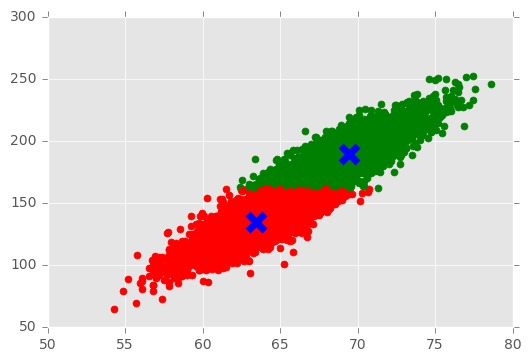

In [139]:
for i in range(len(lis)):
#     print("coordinate:",lis[i], "label:", labels[i])
    plt.plot(lis[i][0], lis[i][1], colors[labels[i]], markersize = 10)
# plt.show()

plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()